Forecasting

In [1]:
library(changepoint)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Successfully loaded changepoint package version 2.2.2
 NOTE: Predefined penalty values changed in version 2.2.  Previous penalty values with a postfix 1 i.e. SIC1 are now without i.e. SIC and previous penalties without a postfix i.e. SIC are now with a postfix 0 i.e. SIC0. See NEWS and help files for further details.


In [2]:
susceptibilities=c(96, 94, 86, 97, 83, 79, 80, 78, 71, 81, 80, 80, 60, 84, 60, 83, 82, 82, 78)

In [3]:
n=length(susceptibilities)
n

[1] 19

In [4]:
change_points = cpt.mean(susceptibilities, method = "PELT", penalty = "Asymptotic",
	pen.value = 0.05, class = TRUE, param.estimates = TRUE, test.stat = "Normal")

Warning message in penalty_decision(penalty, pen.value, n, diffparam, asymcheck = costfunc, :
“Asymptotic penalty value is not accurate for multiple changes, it should be treated the same as a manual penalty choice.”

In [5]:
change_points

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              cpttype date version data.set method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Thu Dec 14 14:05:41 2017 

summary(.)  :
----------
Created Using changepoint version 2.2.2 
Changepoint type      : Change in mean 
Method of analysis    : PELT 
Test Statistic  : Normal 
Type of penalty       : Asymptotic with value, 19.16635 
Minimum Segment Length : 1 
Maximum no. of cpts   : Inf 
Changepoint Locations : 2 3 4 8 9 12 13 14 15 

Seems really excessive

In [6]:
number_of_change_points = length(cpts(change_points))
number_of_change_points

[1] 9

In [7]:
cpts(change_points)

[1]  2  3  4  8  9 12 13 14 15

In [8]:
last_change_point = cpts(change_points)[number_of_change_points]
last_change_point

[1] 15

These susceptiblities correspond to the following years.

In [9]:
Year = 1991:2009
Year

[1] 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
[16] 2006 2007 2008 2009

In [10]:
length(Year)

[1] 19

In [11]:
susceptibilities[(last_change_point+1):n]

[1] 83 82 82 78

In [12]:
Year[(last_change_point+1):n]

[1] 2006 2007 2008 2009

In [13]:
model<-lm((susceptibilities[(last_change_point+1):n])~(Year[(last_change_point+1):n]))
model


Call:
lm(formula = (susceptibilities[(last_change_point + 1):n]) ~ 
    (Year[(last_change_point + 1):n]))

Coefficients:
                    (Intercept)  Year[(last_change_point + 1):n]  
                         3092.5                             -1.5  


In [14]:
prediction<-(model$coefficients[1])+(2020*(model$coefficients[2]))
prediction

(Intercept) 
       62.5

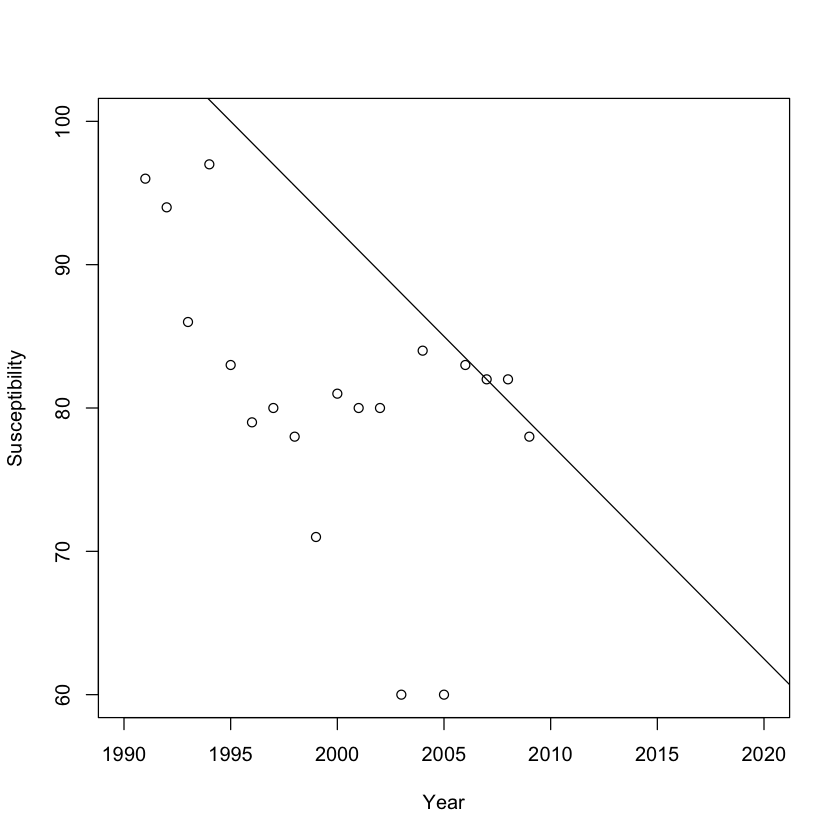

In [16]:
plot(Year,susceptibilities,
    ylim=c(60,100),xlim=c(1990,2020),xlab="Year",ylab="Susceptibility")
abline(model$coefficients)